# Non-invasive Phenotyping for Water and Nitrogen Uptake by Deep Roots Explored using Machine Learning


In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# RadiMax Wheat 2018 and 2019

# Reading RLD data and isotope data of 2018 and 2019 experiments

In [2]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")

# Importing RadiMax modules for RLD data pre-processing
# Pre-Processing 2018 and 2019 RLD data

In [3]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

# Processing 2018 RL data for getting root lengths from pixels values
data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),
    Square_root=True,
)

# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=True,
)

In [4]:
n = 10  # Number of intervals for computation of RL 2018
Soil_depth_range_18 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May18["soil_depth"].min(),
                data_June18["soil_depth"].min(),
                data_July18["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May18["soil_depth"].max(),
                data_June18["soil_depth"].max(),
                data_July18["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_18 = Soil_depth_range_18.astype(int)

In [5]:
Soil_depth_range_18

array([119, 129, 140, 150, 160, 170, 180, 190, 200, 210, 220])

In [6]:
n = 10  # Number of intervals for computation of RL 2019
Soil_depth_range_19 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May19["soil_depth"].min(),
                data_June19["soil_depth"].min(),
                data_July19["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May19["soil_depth"].max(),
                data_June19["soil_depth"].max(),
                data_July19["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_19 = Soil_depth_range_19.astype(int)

# Computation Root Lengths at Different Soil Layers in  2018

In [7]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
# Computation Root Lengths at Different Soil Layers in  2018
RL_May18, _ = fun_RL_computation(
    data_May18.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June18, _ = fun_RL_computation(
    data_June18.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July18, Intervals = fun_RL_computation(
    data_July18.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

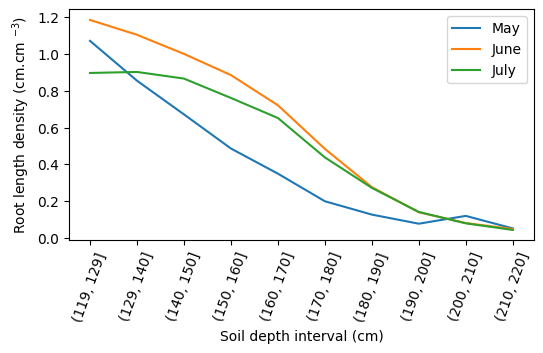

In [8]:
plot_RL(
    RL_May18, RL_June18, RL_July18, Intervals, n
)  #  Transformed data: Square root= True

In [9]:
# Computation Root Lengths in Different Soil Layers in 2019
RL_May19, _ = fun_RL_computation(
    data_May19.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June19, _ = fun_RL_computation(
    data_June19.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July19, Intervals = fun_RL_computation(
    data_July19.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

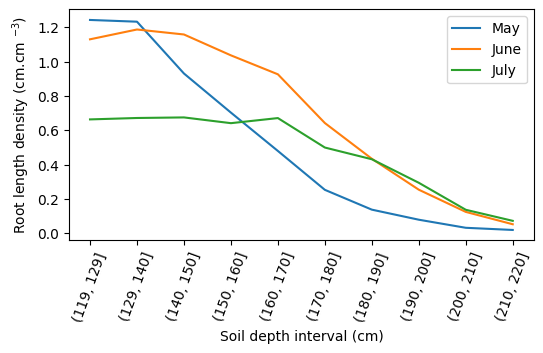

In [10]:
plot_RL(
    RL_May19, RL_June19, RL_July19, Intervals, n
)  #  #  Transformed data: Square root= True

In [11]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_18 = RL_May18.merge(RL_June18, on="row").merge(RL_July18, on="row")

In [12]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_19 = RL_May19.merge(RL_June19, on="row").merge(RL_July19, on="row")

In [13]:
isotope_data_tube18 = isotope_data_preprocess(isotope_data_18.copy(), 2018)

In [14]:
isotope_data_tube19 = isotope_data_preprocess(isotope_data_19.copy(), 2019, side="Both")

In [15]:
# Merging the RLD with isotope data on tube side of Bed 1 and Bed 2
RL_Isotope_Interval_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")
RL_Isotope_Interval_18.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_18.dropna(inplace=True)
RL_Isotope_Interval_18.to_csv("./RL_Interval_data/df_18_Square_root.csv")

In [16]:
RL_Isotope_Interval_18

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.872903,0.482813,0.238575,0.082160,0.072993,0.096735,0.205714,0.181736,0.119734,0.051810,...,0.210213,0.185250,0.149169,0.087449,0.201330,1101,1,1.713046,-24.518905,0.538273
1,0.675988,0.937370,0.391708,0.000000,0.012674,0.020822,0.093967,0.022864,0.119734,0.051810,...,0.000000,0.089406,0.058928,0.000000,0.025394,1102,1,1.215484,-24.813728,0.195143
2,0.466605,0.865015,0.654437,0.090424,0.117596,0.000000,0.026946,0.000000,0.119734,0.051810,...,0.000000,0.094665,0.076116,0.000000,0.057777,1103,1,2.525698,-24.378695,0.926517
3,0.980977,0.727154,0.492139,0.000000,0.014371,0.000000,0.000000,0.048621,0.119734,0.051810,...,0.034383,0.039437,0.037337,0.000000,0.076502,1104,1,2.222993,-25.357771,0.798855
4,0.682960,1.237536,1.326456,0.556002,0.053984,0.005389,0.000000,0.073902,0.119734,0.051810,...,0.143533,0.000000,0.000000,0.125112,0.000000,1105,1,5.704717,-25.992775,1.741293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.267755,1.098852,0.743789,0.477189,1.051263,0.383406,0.090651,0.120730,0.140934,0.012674,...,0.895890,0.499978,0.183449,0.119553,0.109466,2244,2,208.269947,-28.017986,5.338835
280,1.070932,0.854555,0.671495,0.486022,0.349331,0.199325,0.126816,0.077322,0.119734,0.051810,...,0.792787,0.549650,0.000000,0.095101,0.093831,2245,2,257.276033,-27.378227,5.550150
281,1.315934,0.870163,1.016310,0.514637,0.503844,0.469269,0.000000,0.000000,0.000000,0.030821,...,0.489519,0.247729,0.050788,0.052803,0.000000,2246,2,35.373231,-27.424476,3.565955
282,2.044900,1.224438,0.997720,0.265658,0.325922,0.462160,0.049392,0.110104,0.143769,0.035101,...,0.563067,0.000000,0.085564,0.130104,0.019476,2247,2,202.782910,-27.104056,5.312136


In [17]:
RL_Isotope_Interval_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")
RL_Isotope_Interval_19.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_19.dropna(inplace=True)
RL_Isotope_Interval_19.to_csv("./RL_Interval_data/df_19_Square_root.csv")

In [18]:
RL_Isotope_Interval_19

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.624412,1.052538,0.977579,0.000000,0.682658,0.343424,0.076679,0.000000,0.000000,0.050390,...,0.802671,0.320817,0.172322,0.000000,0.000000,1132,1,9.723354,-27.751447,2.274531
1,0.862045,0.960817,0.000000,0.928772,0.496552,0.000000,0.189733,0.000000,0.000000,0.000000,...,0.780297,0.133130,0.020427,0.039437,0.000000,1133,1,2.231121,-27.230851,0.802504
2,1.489196,0.850334,0.750094,0.514372,0.294653,0.421846,0.008710,0.000000,0.050036,0.000000,...,0.261803,0.256430,0.123641,0.000000,0.000000,1134,1,7.455010,-28.088868,2.008886
3,1.479468,1.400406,1.099529,0.790315,0.113998,0.000000,0.000000,0.000000,0.022207,0.000000,...,0.584293,0.102321,0.000000,0.000000,0.000000,1135,1,3.322832,-28.171810,1.200818
4,1.255958,1.048979,0.920631,0.616866,0.200313,0.000000,0.202704,0.027544,0.000000,0.028003,...,0.138262,0.109526,0.154893,0.012318,0.025845,1136,1,2.519944,-27.718919,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.599805,1.847675,0.841763,0.005389,0.069681,0.000000,0.145968,0.000000,0.000000,0.000000,...,0.100639,0.106403,0.100261,0.000000,0.000000,2215,2,29.287565,-28.662173,3.377163
207,1.404200,1.360117,1.417743,0.250918,0.523401,0.000000,0.000000,0.000000,0.010668,0.013772,...,0.036954,0.000000,0.000000,0.063111,0.031424,2216,2,18.457427,-28.229561,2.915467
208,2.380930,1.832748,1.338264,1.451628,0.970083,0.326619,0.194541,0.030795,0.000000,0.000000,...,0.878977,0.797496,0.701274,0.524474,0.158389,2217,2,63.746254,-28.283105,4.154910
209,1.504494,1.376592,1.388258,0.828533,0.283529,0.008710,0.000000,0.000000,0.015086,0.000000,...,0.125690,0.221782,0.031405,0.000000,0.172326,2218,2,23.919325,-29.106020,3.174687


# Facility Position Correction


In [19]:
import pandas as pd

RL_Isotope_Interval_18 = pd.read_csv(
    "./RL_Interval_data/df_18_Square_root.csv", index_col="Unnamed: 0"
)
df = RL_Isotope_Interval_18
dfb1 = df[df.bed == 1]  # Bed 1

Text(0, 0.5, 'Log($\\delta^{15}N$)')

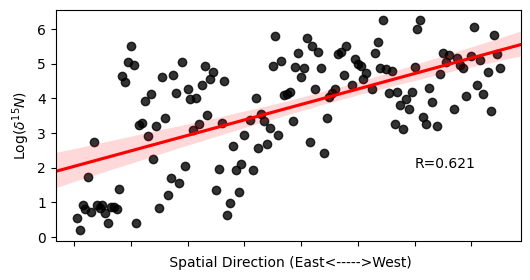

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    1220,
    2,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)

handel = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
handel.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"Log($\delta^{15}N$)")

In [22]:
dfb2 = df[df.bed == 2]  # For Bed 2

Text(0, 0.5, 'Log($\\delta^{15}N$)')

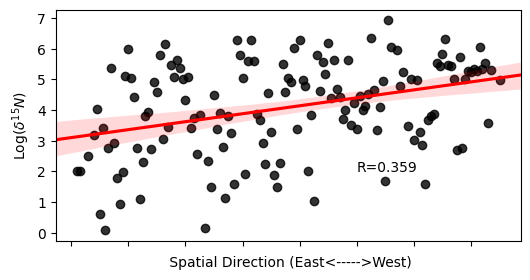

In [23]:
dfb1 = dfb2
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    2200,
    2,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
g1 = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
g1.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"Log($\delta^{15}N$)")

In [26]:
from RadiMaxML import SpatialCorrection

DF_18_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_18.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [27]:
DF_18_Raw_spatial_corrected_L

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-0.009403,-0.375129,-0.242103,-0.087777,-0.028065,0.067146,0.186183,0.169304,-0.013951,-0.004196,...,0.104639,0.172089,0.180110,0.067337,0.194635,-11.064499,0.984011,-1.520368,1,1101
1,-0.209413,0.078605,-0.092336,-0.174529,-0.091907,-0.011140,0.073167,0.009765,-0.013443,-0.004069,...,-0.109425,0.073270,0.088039,-0.020557,0.018453,-12.613160,0.702710,-1.885794,1,1102
2,-0.421891,0.005427,0.167026,-0.088698,0.009492,-0.034336,0.004878,-0.013767,-0.012936,-0.003942,...,-0.113275,0.075554,0.103398,-0.021002,0.050589,-12.354046,1.151266,-1.176714,1,1103
3,0.089385,-0.133258,0.001362,-0.183713,-0.097256,-0.036709,-0.023335,0.034186,-0.012429,-0.003815,...,-0.082741,0.017351,0.062789,-0.021447,0.069067,-13.707850,0.185713,-1.326672,1,1104
4,-0.211727,0.376300,0.832312,0.367697,-0.061166,-0.033694,-0.024603,0.058799,-0.011922,-0.003688,...,0.022559,-0.025061,0.023622,0.103220,-0.007681,-11.277226,-0.435768,-0.406529,1,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.096622,0.139264,0.048284,-0.033580,0.579062,0.093818,-0.123996,-0.014446,-0.074238,-0.083831,...,0.271666,0.028120,-0.108680,-0.058328,0.003594,7.124155,-1.218281,0.366751,2,2244
280,-0.101825,-0.107312,-0.024985,-0.025311,-0.124699,-0.091590,-0.088848,-0.058453,-0.096459,-0.045263,...,0.166796,0.075701,-0.293660,-0.083788,-0.012653,55.182932,-0.574820,0.565086,2,2245
281,0.141554,-0.093983,0.318853,0.002740,0.027986,0.177028,-0.216680,-0.136373,-0.217214,-0.066820,...,-0.138238,-0.228311,-0.244401,-0.127096,-0.107096,-167.667178,-0.617366,-1.432087,2,2246
282,0.868896,0.258013,0.299287,-0.246801,-0.151765,0.168591,-0.168305,-0.026867,-0.074466,-0.063109,...,-0.066457,-0.478131,-0.211156,-0.050803,-0.088232,-1.204809,-0.293244,0.301115,2,2247


In [28]:
DF_18_Raw_spatial_corrected_L.to_csv("DF_18_Raw_spatial_corrected_L.csv")

In [29]:
DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

In [30]:
DF_18_Raw_spatial_corrected_L.iloc[:, 0:-2]

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(150, 160]","RL_July_SD_(160, 170]","RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N
0,-0.009403,-0.375129,-0.242103,-0.087777,-0.028065,0.067146,0.186183,0.169304,-0.013951,-0.004196,...,-0.314907,-0.014333,0.104639,0.172089,0.180110,0.067337,0.194635,-11.064499,0.984011,-1.520368
1,-0.209413,0.078605,-0.092336,-0.174529,-0.091907,-0.011140,0.073167,0.009765,-0.013443,-0.004069,...,-0.288751,-0.266672,-0.109425,0.073270,0.088039,-0.020557,0.018453,-12.613160,0.702710,-1.885794
2,-0.421891,0.005427,0.167026,-0.088698,0.009492,-0.034336,0.004878,-0.013767,-0.012936,-0.003942,...,-0.278813,-0.106571,-0.113275,0.075554,0.103398,-0.021002,0.050589,-12.354046,1.151266,-1.176714
3,0.089385,-0.133258,0.001362,-0.183713,-0.097256,-0.036709,-0.023335,0.034186,-0.012429,-0.003815,...,-0.209570,-0.241173,-0.082741,0.017351,0.062789,-0.021447,0.069067,-13.707850,0.185713,-1.326672
4,-0.211727,0.376300,0.832312,0.367697,-0.061166,-0.033694,-0.024603,0.058799,-0.011922,-0.003688,...,0.555229,0.092336,0.022559,-0.025061,0.023622,0.103220,-0.007681,-11.277226,-0.435768,-0.406529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.096622,0.139264,0.048284,-0.033580,0.579062,0.093818,-0.123996,-0.014446,-0.074238,-0.083831,...,-0.314597,0.500193,0.271666,0.028120,-0.108680,-0.058328,0.003594,7.124155,-1.218281,0.366751
280,-0.101825,-0.107312,-0.024985,-0.025311,-0.124699,-0.091590,-0.088848,-0.058453,-0.096459,-0.045263,...,0.045954,0.060444,0.166796,0.075701,-0.293660,-0.083788,-0.012653,55.182932,-0.574820,0.565086
281,0.141554,-0.093983,0.318853,0.002740,0.027986,0.177028,-0.216680,-0.136373,-0.217214,-0.066820,...,0.275331,0.098653,-0.138238,-0.228311,-0.244401,-0.127096,-0.107096,-167.667178,-0.617366,-1.432087
282,0.868896,0.258013,0.299287,-0.246801,-0.151765,0.168591,-0.168305,-0.026867,-0.074466,-0.063109,...,-0.036196,0.389884,-0.066457,-0.478131,-0.211156,-0.050803,-0.088232,-1.204809,-0.293244,0.301115


In [ ]:
import pandas as pd
from RadiMaxML import Feature_Importances_OLD

LDF_Raw_Full_test_r, Fim_raw = Feature_Importances_OLD(
    DF_18_Raw_spatial_corrected_L.iloc[:, 0:-2]
)

In [33]:
import warnings

warnings.filterwarnings("ignore")

In [34]:
RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            2,
            3,
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [50, 100, 200, 300, 500, 1000],
        "max_features": [3, 5, 10, 20, None],  # If None, then max_features=n_features.
    }
]

# Modelling on 2018 Dataset
# Random Forest using nested cross-validation

In [35]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, "auto"],  # If None, then max_features=n_features.
    }
]

# Calling Random forest 
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.88 test 0.46
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.87 test 0.31
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.88 test 0.29
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 0.87 test 0.31
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.89 test 0.09
Full test r 0.24
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.87 test 0.55
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.87 test 0.56
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.97 test 0.42
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 3, R train 0.87 test 0.43
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.88 test 0.35
Full test r 0.46
 
Delta_13C RF
{'max_depth': 10, 'max_features': 5

In [36]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.241119
Log_Delta_15N,0.463559
Delta_13C,0.425325


In [37]:
pval

,RF
Delta_15N,4.021593e-05
Log_Delta_15N,1.549977e-16
Delta_13C,6.629409e-14


In [ ]:
Fim_raw

In [38]:
col = DF_18_Raw_spatial_corrected_L.iloc[:, 0:-5].columns
col

Index(['RL_May_SD_(119, 129]', 'RL_May_SD_(129, 140]', 'RL_May_SD_(140, 150]',
       'RL_May_SD_(150, 160]', 'RL_May_SD_(160, 170]', 'RL_May_SD_(170, 180]',
       'RL_May_SD_(180, 190]', 'RL_May_SD_(190, 200]', 'RL_May_SD_(200, 210]',
       'RL_May_SD_(210, 220]', 'RL_June_SD_(119, 129]',
       'RL_June_SD_(129, 140]', 'RL_June_SD_(140, 150]',
       'RL_June_SD_(150, 160]', 'RL_June_SD_(160, 170]',
       'RL_June_SD_(170, 180]', 'RL_June_SD_(180, 190]',
       'RL_June_SD_(190, 200]', 'RL_June_SD_(200, 210]',
       'RL_June_SD_(210, 220]', 'RL_July_SD_(119, 129]',
       'RL_July_SD_(129, 140]', 'RL_July_SD_(140, 150]',
       'RL_July_SD_(150, 160]', 'RL_July_SD_(160, 170]',
       'RL_July_SD_(170, 180]', 'RL_July_SD_(180, 190]',
       'RL_July_SD_(190, 200]', 'RL_July_SD_(200, 210]',
       'RL_July_SD_(210, 220]'],
      dtype='object')

# Feature Importance of Root Distributions for predicting Isotope measurements 

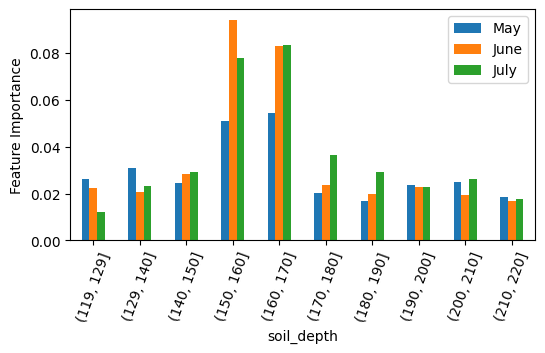

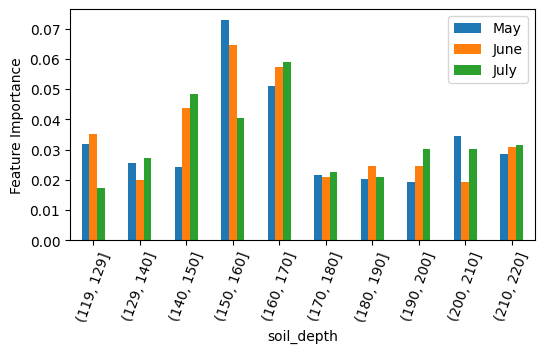

In [39]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

# Gradient Boosting using nested cross-validation

In [54]:
# Gradient Boosting Algorithm

import warnings
warnings.filterwarnings("ignore")

GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10,30],  # If None, then max_features=n_features.
    }
]

LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)


 
Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.32
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test 0.35
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.17
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.18
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.03
Full test r 0.18
 
Log_Delta_15N GB
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.50
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test 0.41
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.33
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.42
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.38
Full test r 0.41
 
Delta_13C GB
{'max_depth': 10, 'max_features'

# Performance metric: Correlation 

In [50]:
LDF_Raw_Full_test_r

,GB
Delta_15N,0.197360
Log_Delta_15N,0.391494
Delta_13C,0.387143


# Modelling on 2019 Dataset

In [40]:
from RadiMaxML import SpatialCorrection

DF_19_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_19.copy(), "L"
)  # L for Linear


 Linear correction: Done


# Random Forest using nested cross-validation

In [66]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, "auto"],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.89 test -0.02
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.89 test 0.20
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.88 test 0.25
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 0.98 test 0.07
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.91 test 0.31
Full test r 0.14
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.91 test 0.10
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.99 test 0.06
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.99 test 0.34
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 3, R train 0.94 test 0.05
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.92 test 0.20
Full test r 0.13
 
Delta_13C RF
{'max_depth': 5, 'max_features':

# Performance metric: Correlation 

In [69]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.141939
Log_Delta_15N,0.132424
Delta_13C,0.039350


# p-values of above correlations

In [71]:
pval

,RF
Delta_15N,0.039401
Log_Delta_15N,0.054780
Delta_13C,0.569748


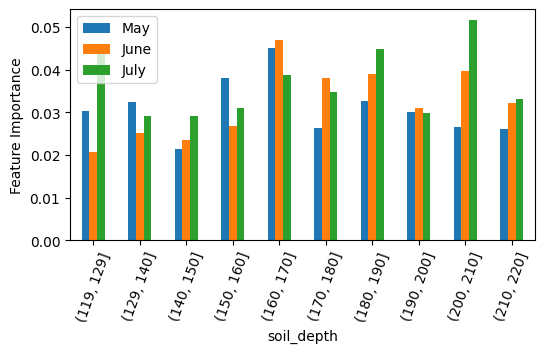

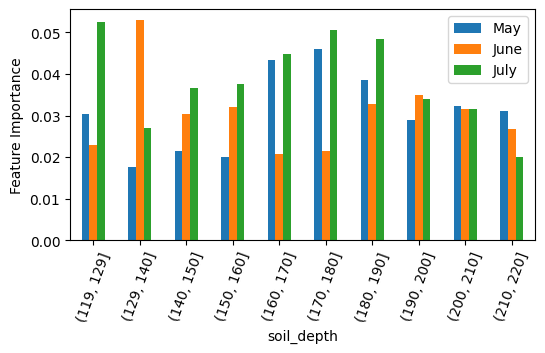

In [72]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

# Gradient Boosting using nested cross-validation

In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, 15],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "GB"
)

 
Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.16
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test -0.13
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.12
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.02
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.29
Full test r 0.11
 
Log_Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test -0.03
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test -0.16
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.24
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.03
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.30
Full test r 0.07
 
Delta_13C GB
{'max_depth': 5, 'max_f

In [63]:
LDF_Raw_Full_test_r

,GB
Delta_15N,0.111977
Log_Delta_15N,0.065844
Delta_13C,0.055939


In [64]:
pval

,GB
Delta_15N,0.104802
Log_Delta_15N,0.341202
Delta_13C,0.418879
